In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Analyse en Composantes Principales : Exemple de données sur les crabes 

**Campbell (1974)** a étudié les **crabes communs** du genre leptograpsus. 
Une espèce, L. variegatus , avait été scindée en deux nouvelles espèces selon leur couleur : orange et bleu. Les spécimens conservés perdent leur couleur, on espérait donc que les différences morphologiques permettraient de classer le matériel muséal. Des données sont disponibles sur 50 spécimens de chaque sexe et de de chaque espèce. Chaque spécimen a des mesures sur:

* la taille du lobe frontal FL,
* la largeur arrière du crabe RW,
* la longueur lde la carapace CL,
* la largeur de la carapace CW, et
* l'epaisseur du corps en mm BD .

en plus de la couleur et du sexe 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. En premier lieu, effectuer une analyse ACP avec deux dimensions. Quelle quantité d'information est préservée dans ce cas ?

2. Représenter les individus dans les deux axes factoriels principaux :

* sans disctinction,
* avec distinction de la couleur uniquement,
* avec distinction de l'espèce uniquement,
* avec distinction de la couleur et de l'espèce (croisement des deux catégories).

Que constatez-vous ? 

3. Effectuer une ACP en gardant toutes les dimentions, puis utiliser les métriques pour retrouver des suggestions du nombre de dimensions à retenir.

4. Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des facteurs que vous avez gardés, et analyser.

5. Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les facteurs que avez gardés et analyser.

In [3]:
data = pd.read_csv("/content/drive/MyDrive/MT15-local/TP2_ACP/data/crabs.csv") 
data.head(2)

,Unnamed: 0,sp,sex,index,FL,RW,CL,CW,BD
0,1,B,M,1,8.1,6.7,16.1,19.0,7.0
1,2,B,M,2,8.8,7.7,18.1,20.8,7.4


In [4]:
#En premier lieu, effectuer une analyse ACP avec deux dimensions. Quelle quantité d'information est préservée dans ce cas ?
# Import
from sklearn.preprocessing import StandardScaler
X_quanti = data.iloc[:,4:]
print(X_quanti)
#verifier
Z = StandardScaler().fit_transform(X_quanti)
print(np.mean(Z,axis=0))
print(np.std(Z,axis=0))
# Import
from sklearn.decomposition import PCA
# Instanciation puis effectuation de l'ACP avec la méthode SVD Décomposition en valeurs singulières 
acp = PCA(svd_solver='full')
# on récupère les coordonnées factorielles dans la matrice coord
coord = acp.fit_transform(Z)

# Nombre de composantes calculées
n = (acp.n_components_)
print(n)
# Récupérer les valeurs propres / variance / inertie
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement 
print(eigval)
# Ratio de réprésentation des valeurs propres
# ou pourcentage d'inertie expliquée par chaque axe
print(acp.explained_variance_ratio_)
print("Quantité d'information est préservée:",acp.explained_variance_ratio_[0]+acp.explained_variance_ratio_[1])

       FL    RW    CL    CW    BD
0     8.1   6.7  16.1  19.0   7.0
1     8.8   7.7  18.1  20.8   7.4
2     9.2   7.8  19.0  22.4   7.7
3     9.6   7.9  20.1  23.1   8.2
4     9.8   8.0  20.3  23.0   8.2
..    ...   ...   ...   ...   ...
195  21.4  18.0  41.2  46.2  18.7
196  21.7  17.1  41.7  47.2  19.6
197  21.9  17.2  42.6  47.4  19.5
198  22.5  17.2  43.0  48.7  19.8
199  23.1  20.2  46.2  52.5  21.1

[200 rows x 5 columns]
[-7.10542736e-17  6.03961325e-16  1.06581410e-16 -4.97379915e-16
  0.00000000e+00]
[1. 1. 1. 1. 1.]
5
[4.78883478e+00 1.51685207e-01 4.66329741e-02 1.11353571e-02
 1.71167766e-03]
[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
Quantité d'information est préservée: 0.9881039982213373


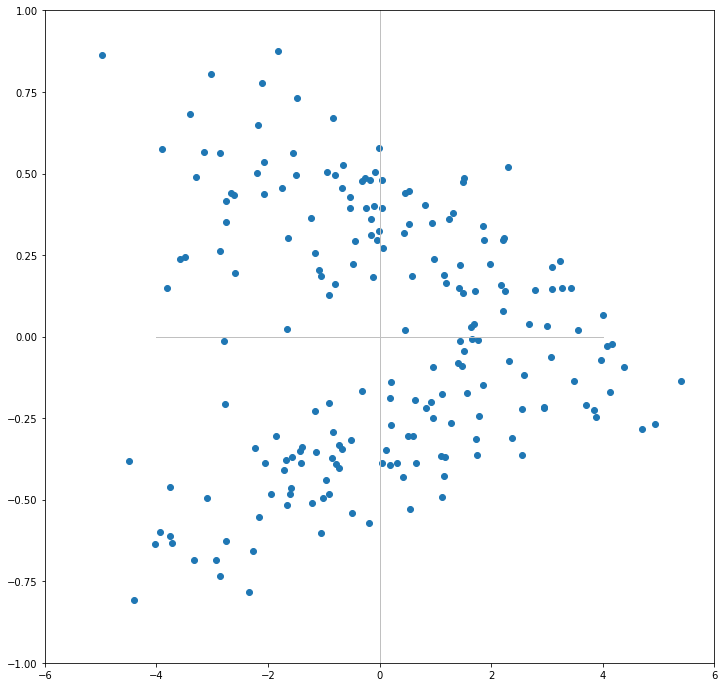

In [5]:
#Représenter les individus dans les deux axes factoriels principaux :

#sans disctinction,

# Création du graphique 
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-6,6) 
ax.set_ylim(-1,1) 

# Placement des points
plt.scatter(coord[:,0],coord[:,1])

# Ajout Des axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)

# Affichage
plt.show()

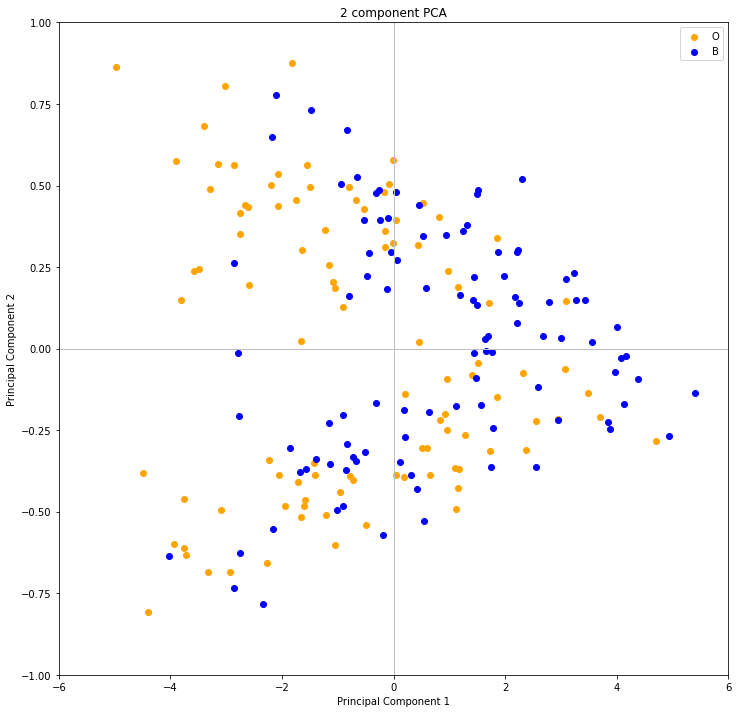

In [6]:
#avec distinction de la couleur uniquement
# Visualisation de la matrice avec distinction de l'espèce
principaldf = pd.DataFrame(data=coord[:,[0,1]], columns=['Axe principal 1', 'Axe principal 2'])
finaldata = pd.concat([principaldf, data.iloc[:,1:3]], axis= 1)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-6,6) #même limites en abscisse
ax.set_ylim(-1,1) #et en ordonnée

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

targets = ['O', 'B']
colors = ['orange', 'blue']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas où le nom de l'espèce correspond à "target" et sera donc en couleur "color"
    indice_bool = finaldata['sp'] == target
    # Loc[ligne, colonne] : ici loc récupère uniquement les lignes qui correspondent à True
    ax.scatter(finaldata.loc[indice_bool, 'Axe principal 1'], finaldata.loc[indice_bool, 'Axe principal 2'], c = color)
ax.legend(targets)

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

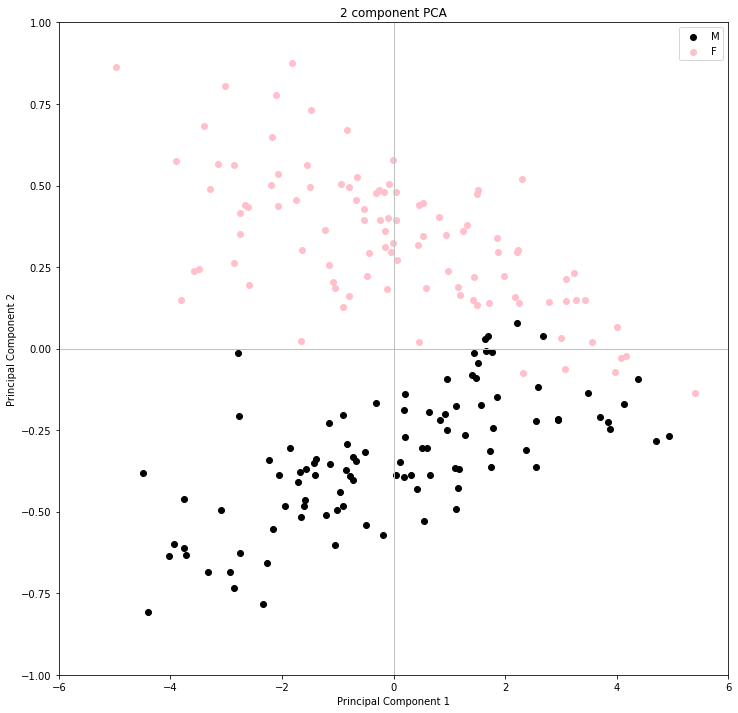

In [7]:
#avec distinction de l'espèce uniquement,
# Visualisation de la matrice avec distinction de l'espèce
principaldf = pd.DataFrame(data=coord[:,[0,1]], columns=['Axe principal 1', 'Axe principal 2'])
finaldata = pd.concat([principaldf, data.iloc[:,1:3]], axis= 1)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-6,6) #même limites en abscisse
ax.set_ylim(-1,1) #et en ordonnée

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

targets = ['M', 'F']
colors = ['black', 'pink']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas où le nom de l'espèce correspond à "target" et sera donc en couleur "color"
    indice_bool = finaldata['sex'] == target
    # Loc[ligne, colonne] : ici loc récupère uniquement les lignes qui correspondent à True
    ax.scatter(finaldata.loc[indice_bool, 'Axe principal 1']
               , finaldata.loc[indice_bool, 'Axe principal 2']
               , c = color)
ax.legend(targets)

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

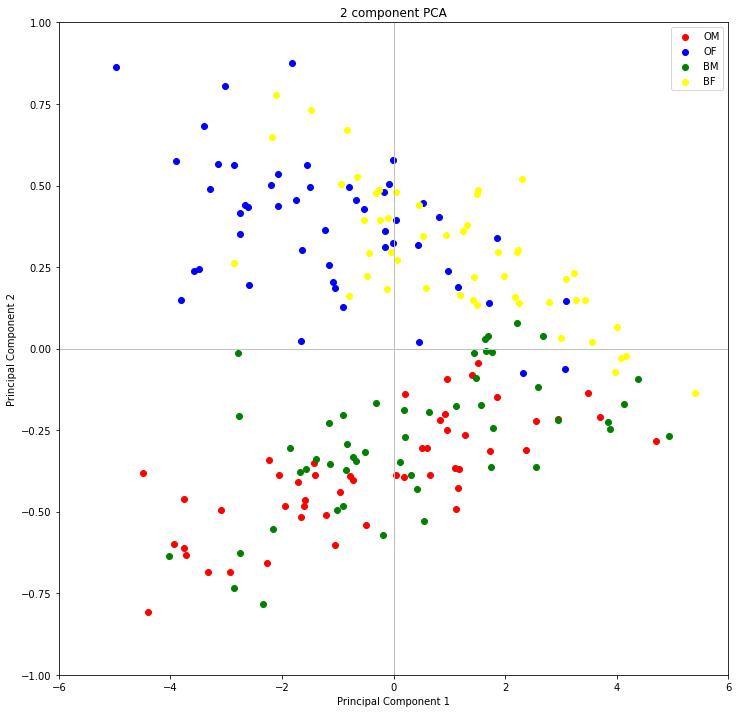

In [8]:
#avec distinction de la couleur et de l'espèce (croisement des deux catégories).
# Visualisation de la matrice avec distinction de l'espèce
principaldf = pd.DataFrame(data=coord[:,[0,1]], columns=['Axe principal 1', 'Axe principal 2'])
finaldata = pd.concat([principaldf, data.iloc[:,1:3]], axis= 1)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-6,6) #même limites en abscisse
ax.set_ylim(-1,1) #et en ordonnée

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

targets = ['OM', 'OF', 'BM', 'BF']
colors = ['red', 'blue', 'green', 'yellow']

for target, color in zip(targets,colors):
    # L'indice est True dans le cas où le nom de l'espèce correspond à "target" et sera donc en couleur "color"
    indice_bool=(finaldata['sp']+finaldata['sex']) == target
    # Loc[ligne, colonne] : ici loc récupère uniquement les lignes qui correspondent à True
    ax.scatter(finaldata.loc[indice_bool, 'Axe principal 1']
               , finaldata.loc[indice_bool, 'Axe principal 2']
               , c = color)
ax.legend(targets)

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

In [9]:
#Effectuer une ACP en gardant toutes les dimentions, puis utiliser les métriques pour retrouver des suggestions du nombre de dimensions à retenir.
# Import
from sklearn.decomposition import PCA

# Instanciation puis effectuation de l'ACP avec la méthode SVD Décomposition en valeurs singulières 
acp = PCA(svd_solver='full')
# on récupère les coordonnées factorielles dans la matrice coord
coord = acp.fit_transform(Z)

# Nombre de composantes calculées
n = (acp.n_components_)
print(n)

# Récupérer les valeurs propres / variance / inertie
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement 
print(eigval)

# Test des bâtons brisés
m = 1/np.arange(n, 0, -1)
bk = np.cumsum(m)
bk = bk[::-1]

# le critère de Kaiser
nb_composante = 0
for val_propre in eigval:
  if val_propre > 1:
    nb_composante=nb_composante+1
print("le nombre de dimension par Kaiser retenues est : ", nb_composante)

#le critère de Karlis – Saporta - Spinaki 
seuil = 1+2*np.sqrt((5-1)/(200-1))
nb_composante = 0
for val_propre in eigval:
  if val_propre > seuil:
    nb_composante=nb_composante+1
print("le nombre de dimension par Karlis retenues est : ", nb_composante)

5
[4.78883478e+00 1.51685207e-01 4.66329741e-02 1.11353571e-02
 1.71167766e-03]
le nombre de dimension par Kaiser retenues est :  1
le nombre de dimension par Karlis retenues est :  1


In [10]:
#Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des facteurs que vous avez gardés, et analyser
# Contributions des individus dans l'inertie totale
# elles représentent les carrés des distances à l’origine des individus
di2 = np.sum(coord**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di2}))

      ID        d_i
0      0  24.374345
1      1  19.248972
2      2  17.078416
3      3  15.144076
4      4  14.754059
..   ...        ...
195  195  12.046593
196  196  12.335237
197  197  13.008286
198  198  14.610705
199  199  25.516208

[200 rows x 2 columns]


In [11]:
# Qualité de représentation des individus - COS2
COS2 = coord**2
# On calcule la qualité de représentation des individus sur chacun des 5 axes
for j in range(5):
     COS2[:,j] = COS2[:,j]/di2
# On l'affiche pour les deux principaux axes
print(pd.DataFrame({'COS^2_1':COS2[:,0],'COS^2_2':COS2[:,1],'COS^2_3':COS2[:,2],'COS^2_4':COS2[:,3],'COS^2_5':COS2[:,4]}))

      COS^2_1   COS^2_2   COS^2_3   COS^2_4       COS^2_5
0    0.996169  0.002957  0.000613  0.000063  1.979931e-04
1    0.999458  0.000460  0.000080  0.000002  4.839818e-07
2    0.998094  0.001670  0.000066  0.000085  8.482196e-05
3    0.995966  0.003996  0.000014  0.000024  1.141801e-07
4    0.996334  0.003406  0.000015  0.000202  4.196886e-05
..        ...       ...       ...       ...           ...
195  0.954457  0.038556  0.005478  0.001504  5.681829e-06
196  0.986224  0.004797  0.008228  0.000195  5.562326e-04
197  0.988669  0.004409  0.006015  0.000905  1.627291e-06
198  0.990310  0.001491  0.005540  0.002244  4.159819e-04
199  0.970438  0.029305  0.000221  0.000021  1.433048e-05

[200 rows x 5 columns]


In [12]:
# Contributions des varibles aux axes
CTR = coord**2
for j in range(5):
  CTR[:,j] = CTR[:,j]/(200*eigval[j])
print(pd.DataFrame({'id':data.index,'CTR_1':CTR[:,0],'CTR_2':CTR[:,1],'CTR_3':CTR[:,2],'CTR_4':CTR[:,3],'CTR_5':CTR[:,4]}))

      id     CTR_1     CTR_2     CTR_3     CTR_4     CTR_5
0      0  0.025352  0.002375  0.001603  0.000688  0.014097
1      1  0.020087  0.000292  0.000165  0.000013  0.000027
2      2  0.017798  0.000940  0.000121  0.000652  0.004232
3      3  0.015748  0.001995  0.000023  0.000164  0.000005
4      4  0.015348  0.001656  0.000024  0.001340  0.001809
..   ...       ...       ...       ...       ...       ...
195  195  0.012005  0.015310  0.007075  0.008134  0.000200
196  196  0.012702  0.001951  0.010883  0.001078  0.020043
197  197  0.013428  0.001891  0.008390  0.005285  0.000062
198  198  0.015107  0.000718  0.008678  0.014719  0.017754
199  199  0.025854  0.024648  0.000605  0.000242  0.001068

[200 rows x 6 columns]


In [13]:
#Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les facteurs que avez gardés et analyser.
# Nous avons besoin des vecteurs propres pour l’analyse des variables.
# on récupère le champ components_ de l'objet ACP 
# Attention acp.components retourne la matrice des vecteurs propres facteurs x variables
# il faut la transposer pour avoir la matrice des vecteurs propres variables x facteurs  
vp_mat=acp.components_.T
vp_mat
# On calcule la racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
# Corrélation des variables avec les axes
corvar = np.zeros((5,5))
for k in range(5):
     corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]

# Afficher la matrice des corrélations variables x facteurs
print(corvar)

[[-9.89225553e-01 -5.35834770e-02 -1.14617683e-01  7.35422825e-02
   3.99208978e-03]
 [-9.36779085e-01  3.49793038e-01  2.58685744e-03 -8.83271371e-03
  -2.25138779e-03]
 [-9.91736320e-01 -1.04470135e-01  6.68747067e-02 -1.52443702e-04
  -3.27538329e-02]
 [-9.87188293e-01 -7.03362873e-02  1.40920239e-01  9.41147313e-03
   2.37695642e-02]
 [-9.87233956e-01 -1.02944869e-01 -9.56991586e-02 -7.45672444e-02
   7.27092696e-03]]


  VAL     cor_1     cor_2     cor_3     cor_4     cor_5
0  FL -0.989226 -0.053583 -0.114618  0.073542  0.003992
1  RW -0.936779  0.349793  0.002587 -0.008833 -0.002251
2  CL -0.991736 -0.104470  0.066875 -0.000152 -0.032754
3  CW -0.987188 -0.070336  0.140920  0.009411  0.023770
4  BD -0.987234 -0.102945 -0.095699 -0.074567  0.007271


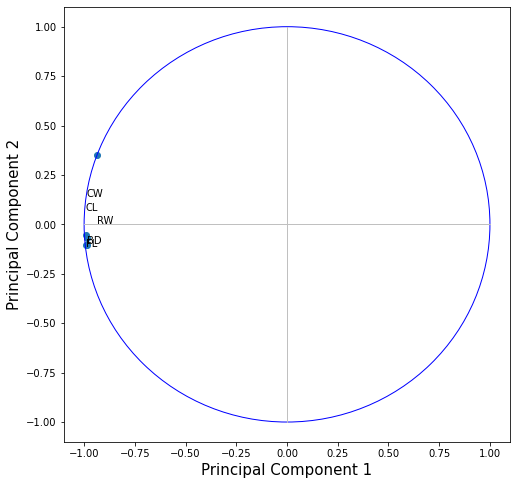

In [17]:
#Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les facteurs que avez gardés et analyser.
print(pd.DataFrame({'VAL':data.columns[4:9], 'cor_1':corvar[:,0], 'cor_2':corvar[:,1], 'cor_3':corvar[:,2], 'cor_4':corvar[:,3], 'cor_5':corvar[:,4]}))

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlabel('Principal Component 1', fontsize = 15)
axes.set_ylabel('Principal Component 2', fontsize = 15)

plt.scatter(corvar[:,0], corvar[:,1])

for j in range(5):
  plt.annotate(data.columns[4+j],(corvar[j,0], corvar[j,2]))

plt.plot([-1,1],[0,0],color='silver', linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver', linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='b',fill=False)
axes.add_artist(cercle)
plt.show()

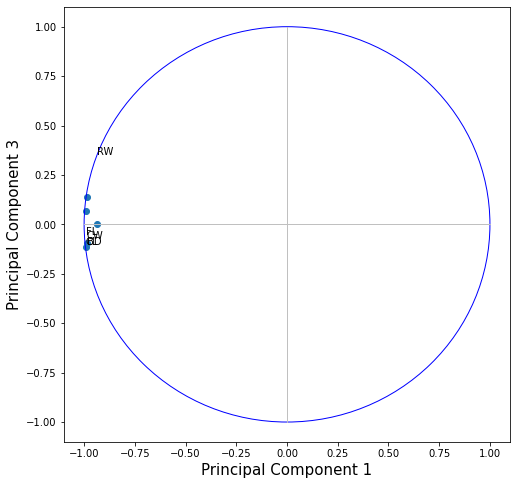

In [18]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlabel('Principal Component 1', fontsize = 15)
axes.set_ylabel('Principal Component 3', fontsize = 15)

plt.scatter(corvar[:,0], corvar[:,2])

for j in range(5):
  plt.annotate(data.columns[4+j],(corvar[j,0], corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver', linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver', linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='b',fill=False)
axes.add_artist(cercle)
plt.show()

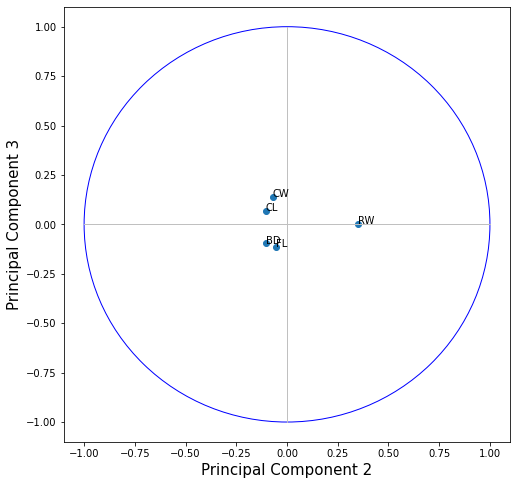

In [16]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlabel('Principal Component 2', fontsize = 15)
axes.set_ylabel('Principal Component 3', fontsize = 15)

plt.scatter(corvar[:,1], corvar[:,2])

for j in range(5):
  plt.annotate(data.columns[4+j],(corvar[j,1], corvar[j,2]))

plt.plot([-1,1],[0,0],color='silver', linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver', linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='b',fill=False)
axes.add_artist(cercle)
plt.show()